# LMAPR1492 : Tâche 7

## Structure des bandes électroniques

In [47]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#Récupération des données de structures de bande

with MPRester("eydjkyvaohvx0D8I") as m:
    structure = m.get_bandstructure_by_material_id("mp-1394")

C:\Users\mariu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pymatgen\ext\matproj.py:186: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


## Bande Interdite

In [49]:
#Valeurs de la bande interdite

gap = structure.get_band_gap()
e_band = gap.get('energy')
print('Energie de la bande :', e_band, 'eV.')
if gap.get('direct') == False:
    print('La bande interdite est indirecte.')
else:
    print('La bande interdite est directe.')

print('La bande interdite se situe entre 0 eV et {} eV.'.format(e_band))
print("Vecteur de transition :", gap['transition'])

Energie de la bande : 1.3181000000000003 eV.
La bande interdite est indirecte.
La bande interdite se situe entre 0 eV et 1.3181000000000003 eV.
Vecteur de transition : X-\Gamma


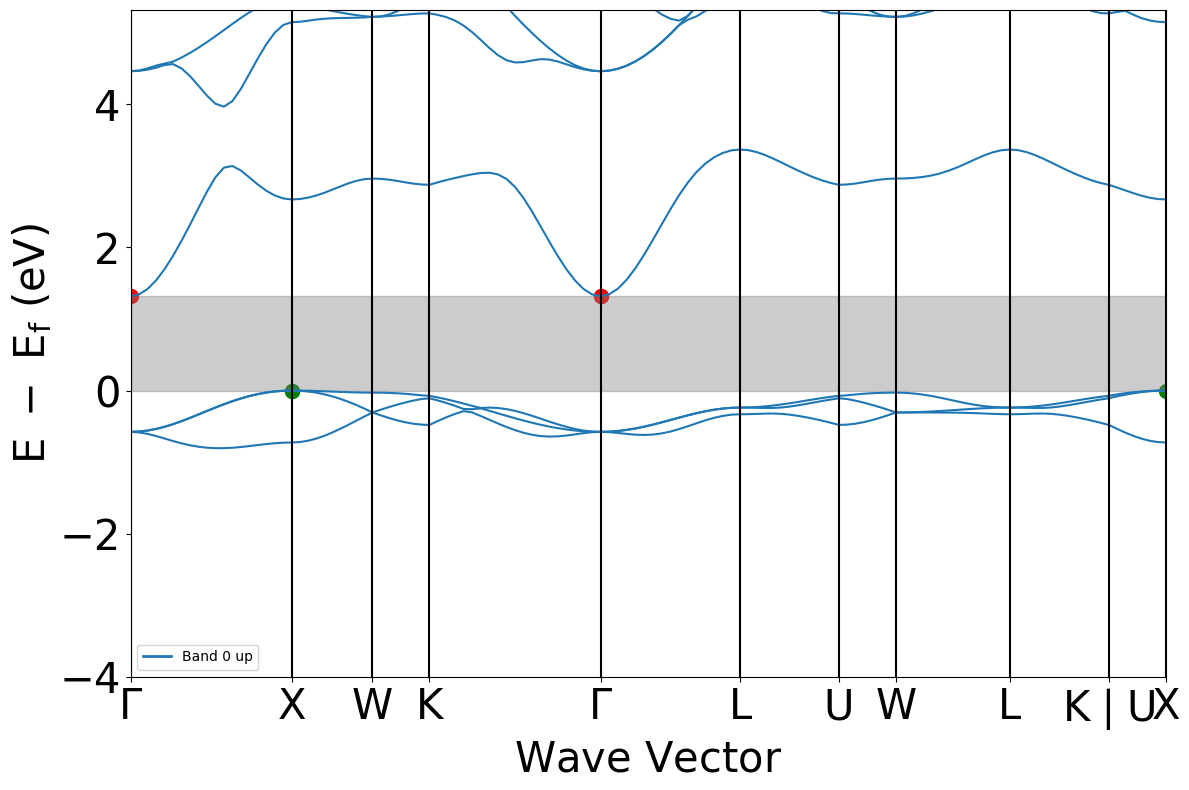

In [50]:
#Plot des bandes de valence et conduction

plot = BSPlotter(structure)
plot.get_plot(vbm_cbm_marker=True)
plt.fill_between(x, 0.0, e_band, color="grey", alpha=0.4)
plt.show()

### Analyse des résultats

Le gap ayant une valeur de l'ordre de 1.3181eV, nous pouvons affirmer que le matériau est un semi-conducteur étant donné que cette valeur est assez faible. Cela signifie que ce matériau pourrait devenir conducteur à condition d'être suffisament excité thermiquement.

La valeur obtenue pour la bande interdite est confirmée par le site "Material Project" où elle vaut 1.8eV.

## Dispersion : maximum et minimum des bandes de Valence et de Conduction

In [51]:
data = plotter.BSPlotter(structure).bs_plot_data()
E_0 = data.get('zero_energy')

#Bande de Valencce
vbm = structure.get_vbm()
E_vbm = vbm['energy']
kpoint_vbm = vbm['kpoint'].cart_coords

print('Bande de Valence :\n')
print('Energie du maximum de la bande de valence = ',E_vbm,'eV')
print('sur le graphe : E-Ef = ', (E_vbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =', kpoint_vbm)
print('--------------------------------------------------------------------------\n')

#Bande de Conduction

cbm = structure.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords

print('Bande de Conduction :\n')
print('Energie du minimum de la bande de conduction = ',E_cbm,'eV')
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =',kpoint_cbm)
print('--------------------------------------------------------------------------\n')

Bande de Valence :

Energie du maximum de la bande de valence =  0.8682 eV
sur le graphe : E-Ef =  0.0
Vecteur k (coordonnées cartésiennes) = [0.         0.91362683 0.        ]
defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11]}) 

--------------------------------------------------------------------------

Bande de Conduction :

Energie du minimum de la bande de conduction =  2.1863 eV
sur le graphe : E-Ef =  1.3181000000000003
Vecteur k (coordonnées cartésiennes) = [0. 0. 0.]
defaultdict(<class 'list'>, {<Spin.up: 1>: [12]}) 

--------------------------------------------------------------------------



In [56]:
x = data.get('ticks').get('distance')
x = np.array([x[0], x[1], x[3], x[5], x[7], x[9], x[11], x[13], x[15], x[17], x[18]])
y = data.get('energy')

In [58]:
dx = np.zeros(10)
dyc = np.zeros(10)
dyv = np.zeros(10)
mc = np.zeros(10)
mv = np.zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]
    
for i in range(10):
    dyv[i] =y.get('1')[i][15][-1] - y.get('1')[i][15][0]
    dyc[i] =y.get('1')[i][16][-1] - y.get('1')[i][16][0]
    
for i in range (10):
    mc[i] = dyc[i]/dx[i]
    mv[i] = dyv[i]/dx[i] 
    

print("En valeur absolue:")
mxV = np.max(abs(mv))
print("Plus grande dispersion pour la bande de valence: ", mxV)
mxC = np.max(abs(mc))
print("Plus grande dispersion pour la bande de conduction: ", mxC)
mnV = np.min(abs(mv))
print("Plus faible dispersion pour la bande de valence: ", mnV)
mnC = np.min(abs(mc))
print("Plus faible dispersion pour la bande de conduction: ", mnC)

En valeur absolue:
Plus grande dispersion pour la bande de valence:  1.8667813794431576
Plus grande dispersion pour la bande de conduction:  2.2173239175756216
Plus faible dispersion pour la bande de valence:  0.009287469549469088
Plus faible dispersion pour la bande de conduction:  0.5630307500174587


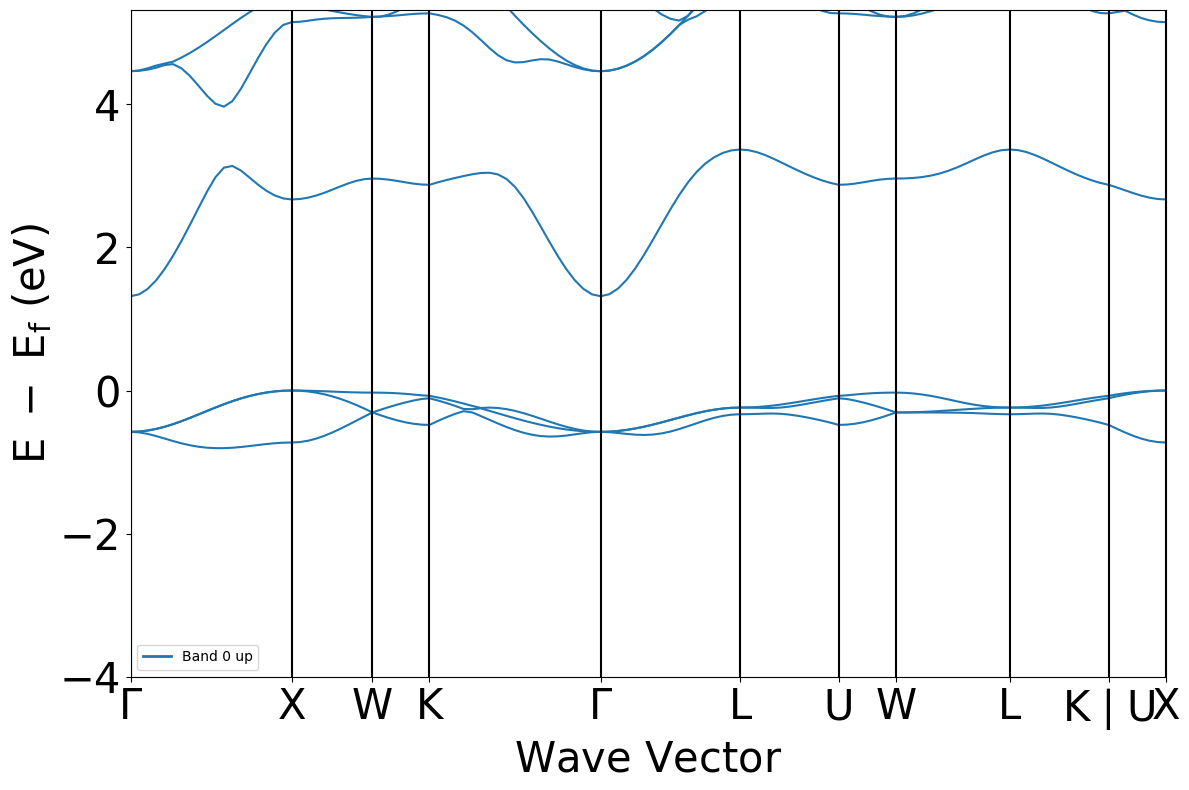

Plus grande dispersion pour la bande de valence en vert
Plus grande dispersion pour la bande de conduction en jaune
Plus petite dispersion pour la bande de valence en rouge
Plus petite dispersion pour la bande de conduction en bleu


In [59]:
BSPlotter(structure).get_plot()
plt.arrow(x[7], (y.get('1')[7][15])[0], dx[7], dyv[7], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[1], (y.get('1')[1][15])[0], dx[1], dyv[1], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(x[0], (y.get('1')[0][16])[0], dx[0], dyc[0], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(x[2], (y.get('1')[2][16])[0], dx[2], dyc[2], color = 'y', head_width = 0.1,length_includes_head=True)

plt.show()

print("Plus grande dispersion pour la bande de valence en vert")
print("Plus grande dispersion pour la bande de conduction en jaune")
print("Plus petite dispersion pour la bande de valence en rouge")
print("Plus petite dispersion pour la bande de conduction en bleu")

# Masse

In [60]:
kpoint_val = structure.get_vbm().get('kpoint').frac_coords
norm_k_val = np.linalg.norm(kpoint_val)
print('Pour la bande de valence, la valeur de la norme est {}'.format(norm_k_val))

kpoint_con = structure.get_cbm().get('kpoint').frac_coords
norm_k_con = np.linalg.norm(kpoint_con)

print('Pour la bande de conduction, la valeur de la norme est {}'.format(norm_k_con))

Pour la bande de valence, la valeur de la norme est 0.7071067811865476
Pour la bande de conduction, la valeur de la norme est 0.0


In [61]:
h_bar = 6.5821e-16
m_electron = 9.11e-31

## Dernière bande de valence

In [62]:
m_vbm = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*abs(E_vbm))
print('La masse effective au sommet de la dernière bande de valence = {} kg.'.format(m_vbm))

La masse effective au sommet de la dernière bande de valence = 2.082652757956557e-31 kg.


## Première bande de conduction

In [63]:
m_cbm = (h_bar**2 * (kpoint_cbm[0]**2+kpoint_cbm[1]**2+kpoint_cbm[2]**2))/(2*E_cbm)
print('La masse effective à la base de la première bande de conduction = {} kg.'.format(m_cbm))

La masse effective à la base de la première bande de conduction = 0.0 kg.
